## Descriptive Statistics

### Author: Sangeeths Chandrakumar

### Importieren der benötigten Bibliotheken

In [41]:
# Import necessary libraries and load the dataset
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Laden der Daten

In [42]:
ds_salaries = pd.read_csv('ds_salaries.csv')
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


### Daten in Trainings- und Testset teilen

In [43]:

# Trennen der Features und des Ziels
X = ds_salaries.drop('salary_in_usd', axis=1)
y = ds_salaries['salary_in_usd']

# Aufteilen der Daten in Trainings- und Testdatensätze (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ergebnis des Splits überprüfen
train_test_split_result = {
    'X_train_shape': X_train.shape,
    'X_test_shape': X_test.shape,
    'y_train_shape': y_train.shape,
    'y_test_shape': y_test.shape
}

train_test_split_result

{'X_train_shape': (3004, 10),
 'X_test_shape': (751, 10),
 'y_train_shape': (3004,),
 'y_test_shape': (751,)}

In [44]:
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [45]:
# Deskriptive Statistiken für das Gehalt in USD
salary_stats = ds_salaries['salary_in_usd'].describe()

# Ausgabe der Ergebnisse
salary_stats

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

1. Anzahl der Beobachtungen: 3.755. Dies zeigt die Gesamtzahl der Datensätze im Gehaltsdatensatz.
2. Durchschnittliches Gehalt (Mittelwert): $137,570. Dies ist der Durchschnittswert aller Gehälter und gibt einen zentralen Tendenzwert an.
3. Standardabweichung: $63,056. Diese Kennzahl zeigt, wie stark die Gehälter um den Mittelwert streuen. Eine hohe Standardabweichung deutet auf eine große Varianz in den Gehältern hin.
4. Minimum: $5,132. Dies ist das niedrigste Gehalt im Datensatz.
5. 25.Perzentil: $95,000. Ein Viertel der Gehälter liegt unter diesem Wert.
6. Median (50. Perzentil): $135,000. Die Hälfte der Gehälter liegt unter diesem Wert und die andere Hälfte darüber. Der Median ist oft resistenter gegenüber Ausreißern als der Mittelwert.
7. 75.Perzentil: $175,000. Drei Viertel der Gehälter liegen unter diesem Wert.
8. Maximum: $450,000. Dies ist das höchste Gehalt im Datensatz.

In [46]:
# Häufigkeitsverteilung für kategorische Variablen
experience_level_counts = ds_salaries['experience_level'].value_counts(normalize=True) * 100
employment_type_counts = ds_salaries['employment_type'].value_counts(normalize=True) * 100
company_size_counts = ds_salaries['company_size'].value_counts(normalize=True) * 100

experience_level_counts, employment_type_counts, company_size_counts


(SE    67.003995
 MI    21.438083
 EN     8.521971
 EX     3.035952
 Name: experience_level, dtype: float64,
 FT    99.014647
 PT     0.452730
 CT     0.266312
 FL     0.266312
 Name: employment_type, dtype: float64,
 M    83.968043
 L    12.090546
 S     3.941411
 Name: company_size, dtype: float64)

1. Erfahrungsniveau:

    1. Senior (SE): 67.00%. Die Mehrheit der Datensätze stammt von Personen mit Senior-Level-Erfahrung.
    2. Mid-Level (MI): 21.44%. Ein signifikanter Anteil der Daten repräsentiert Personen mit mittlerer Erfahrung.
    3. Entry-Level (EN): 8.52%. Ein geringerer Anteil der Daten stammt von Berufseinsteigern.
    4. Executive (EX): 3.04%. Nur ein kleiner Teil der Daten repräsentiert Führungskräfte.

2. Beschäftigungsart:

    1. Vollzeit (FT): 99.01%. Fast alle Datenpunkte repräsentieren Vollzeitbeschäftigte.
    2. Teilzeit (PT): 0.45%. Ein sehr kleiner Anteil der Daten repräsentiert Teilzeitbeschäftigte.
    3. Vertragsbasis (CT) und Freiberuflich (FL): Jeweils 0.27%. Diese Kategorien sind in Ihrem Datensatz nur minimal vertreten.

3. Unternehmensgröße:

    1. Mittelgroß (M): 83.97%. Die meisten Daten stammen von Mitarbeitern mittelgroßer Unternehmen.
    2. Groß (L): 12.09%. Ein kleinerer Anteil repräsentiert große Unternehmen.
    3. Klein (S): 3.94%. Ein geringer Anteil der Daten stammt von Mitarbeitern kleiner Unternehmen.

### Diagramme

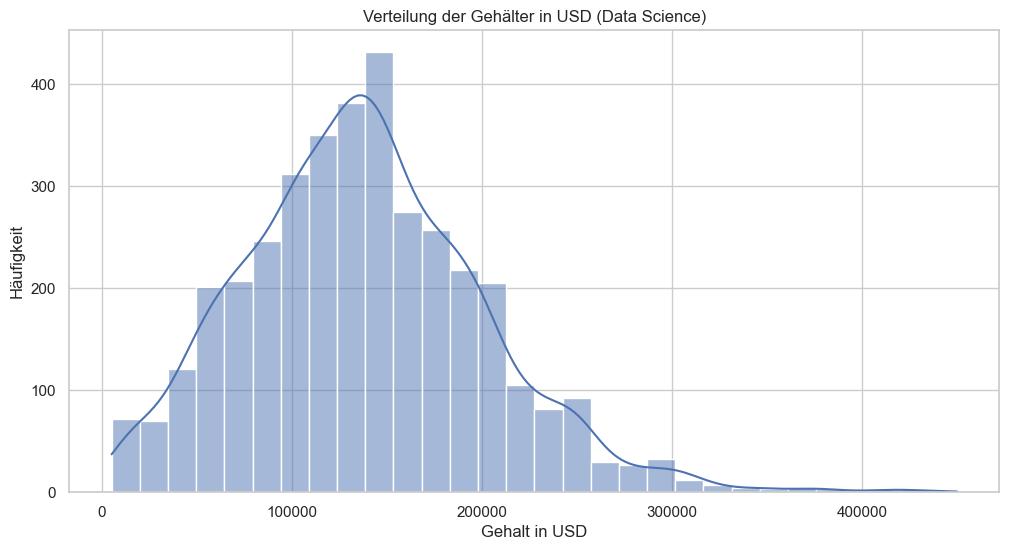

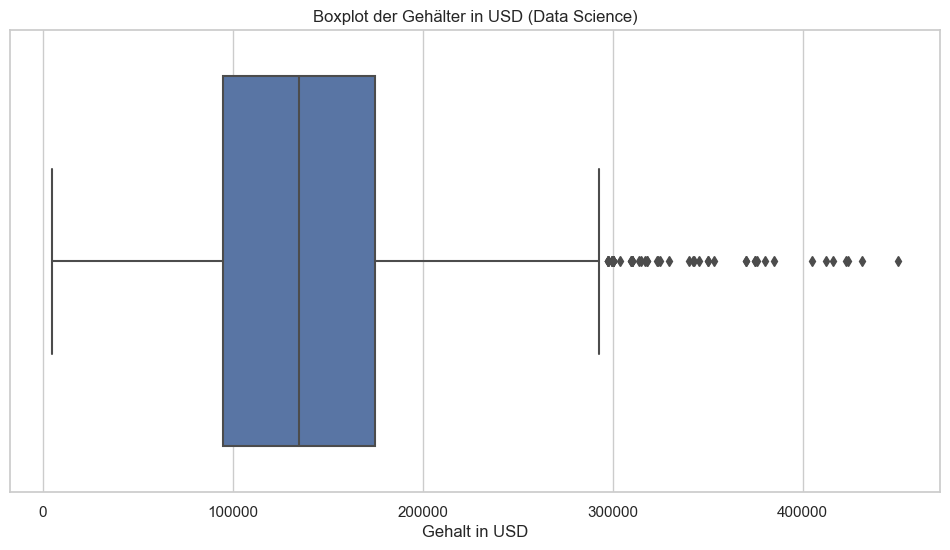

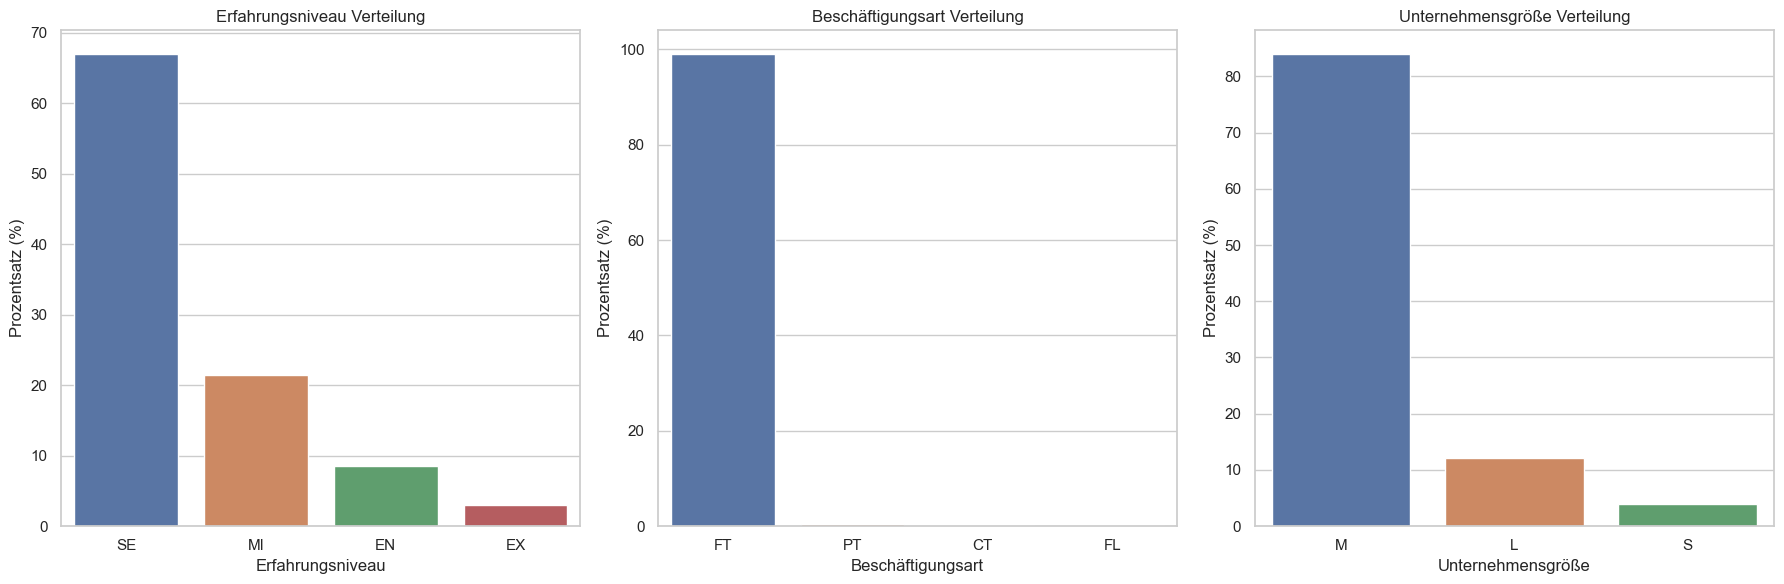

In [47]:
# Einstellen des visuellen Stils
sns.set(style="whitegrid")

# Erstellen eines Histogramms für Gehälter
plt.figure(figsize=(12, 6))
sns.histplot(ds_salaries['salary_in_usd'], bins=30, kde=True)
plt.title('Verteilung der Gehälter in USD (Data Science)')
plt.xlabel('Gehalt in USD')
plt.ylabel('Häufigkeit')
plt.show()

# Erstellen eines Boxplots für Gehälter
plt.figure(figsize=(12, 6))
sns.boxplot(x=ds_salaries['salary_in_usd'])
plt.title('Boxplot der Gehälter in USD (Data Science)')
plt.xlabel('Gehalt in USD')
plt.show()

# Erstellen von Balkendiagrammen für kategorische Variablen
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Erfahrungsniveau
sns.barplot(x=experience_level_counts.index, y=experience_level_counts.values, ax=ax[0])
ax[0].set_title('Erfahrungsniveau Verteilung')
ax[0].set_xlabel('Erfahrungsniveau')
ax[0].set_ylabel('Prozentsatz (%)')

# Beschäftigungsart
sns.barplot(x=employment_type_counts.index, y=employment_type_counts.values, ax=ax[1])
ax[1].set_title('Beschäftigungsart Verteilung')
ax[1].set_xlabel('Beschäftigungsart')
ax[1].set_ylabel('Prozentsatz (%)')

# Unternehmensgröße
sns.barplot(x=company_size_counts.index, y=company_size_counts.values, ax=ax[2])
ax[2].set_title('Unternehmensgröße Verteilung')
ax[2].set_xlabel('Unternehmensgröße')
ax[2].set_ylabel('Prozentsatz (%)')

plt.tight_layout()
plt.show()


1. Histogramm der Gehälter:
    1. Die Verteilung der Gehälter zeigt eine relativ breite Streuung.
    2. Es gibt eine Konzentration von Gehältern um den mittleren Bereich, was durch den Gipfel im Histogramm dargestellt wird.
    3. Der langgestreckte rechte Schwanz des Histogramms deutet auf das Vorhandensein von Ausreißern mit besonders hohen Gehältern hin.

2. Boxplot der Gehälter:
    1. Der Boxplot zeigt deutlich die Quartile und den Median der Gehälter.
    2. Die Länge der "Box" repräsentiert die Interquartilsdistanz und gibt somit einen Überblick über die Streuung der mittleren 50% der Gehälter.
    3. Die "Whisker" (die Linien, die von der Box ausgehen) zeigen die Variabilität außerhalb der oberen und unteren Quartile, und die Punkte außerhalb der Whisker repräsentieren Ausreißer.

3. Balkendiagramme für kategorische Variablen:
    1. Das Balkendiagramm für das Erfahrungsniveau zeigt, dass die Mehrheit der Daten von Senior-Experten stammt, gefolgt von Mid-Level, Entry-Level und wenigen Executives.
    2. Das Balkendiagramm für die Beschäftigungsart verdeutlicht, dass die überwiegende Mehrheit der Daten Vollzeitbeschäftigte betrifft.
    3. Das Balkendiagramm zur Unternehmensgröße zeigt, dass die meisten Daten von mittelgroßen Unternehmen stammen, gefolgt von großen und kleinen Unternehmen.

In [48]:
# Überprüfung auf fehlende Werte und grundlegende statistische Zusammenfassung
missing_values = ds_salaries.isnull().sum()
basic_stats = ds_salaries.describe(include='all', datetime_is_numeric=True)

missing_values, basic_stats

(work_year             0
 experience_level      0
 employment_type       0
 job_title             0
 salary                0
 salary_currency       0
 salary_in_usd         0
 employee_residence    0
 remote_ratio          0
 company_location      0
 company_size          0
 dtype: int64,
           work_year experience_level employment_type      job_title  \
 count   3755.000000             3755            3755           3755   
 unique          NaN                4               4             93   
 top             NaN               SE              FT  Data Engineer   
 freq            NaN             2516            3718           1040   
 mean    2022.373635              NaN             NaN            NaN   
 std        0.691448              NaN             NaN            NaN   
 min     2020.000000              NaN             NaN            NaN   
 25%     2022.000000              NaN             NaN            NaN   
 50%     2022.000000              NaN             NaN         

In [49]:
missing_values = ds_salaries.isnull().sum()
missing_values[missing_values > 0] 

Series([], dtype: int64)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3004, 10), (751, 10), (3004,), (751,))

Im Datensatz gibt es keine fehlenden Werte, daher ist keine Auffüllung notwendig. Wir können direkt zum nächsten Schritt übergehen: der Umwandlung kategorischer Werte in numerische Werte.

### Umwandlung kategorischer Werte in numerische Werte

Einige Spalten im Datensatz, wie experience_level, employment_type, job_title, salary_currency, employee_residence, company_location, und company_size sind kategorisch. Die Umwandlung dieser Werte in numerische Form ist notwendig, um mathematische Berechnungen und Modellierungen zu ermöglichen, da die meisten maschinellen Lernverfahren mit numerischen Daten arbeiten.

In [51]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd



label_encoder = LabelEncoder()


label_encoding_columns = ['experience_level', 'company_size']  # Ordinale Daten
one_hot_encoding_columns = ['employment_type', 'job_title', 'salary_currency', 
                            'employee_residence', 'company_location']  # Nicht-ordinale Daten


for col in label_encoding_columns:
    label_encoder.fit(X_train[col])
    X_train[col] = label_encoder.transform(X_train[col])

    # Anwenden des gleichen Encoders auf die Testdaten
    X_test[col] = label_encoder.transform(X_test[col])


X_train = pd.get_dummies(X_train, columns=one_hot_encoding_columns)
X_test = pd.get_dummies(X_test, columns=one_hot_encoding_columns)


X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)


X_train.head()



,company_location_AE,company_location_AL,company_location_AM,company_location_AR,company_location_AS,company_location_AT,company_location_AU,company_location_BA,company_location_BE,company_location_BO,...,salary_currency_ILS,salary_currency_INR,salary_currency_JPY,salary_currency_MXN,salary_currency_PLN,salary_currency_SGD,salary_currency_THB,salary_currency_TRY,salary_currency_USD,work_year
2238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022
485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2023
2177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2022
3305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2022
1769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2023


In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3004, 272), (751, 272), (3004,), (751,))

Label-Encoding wurde auf die Spalten experience_level und company_size angewendet. Diese Spalten enthalten ordinale Daten, bei denen die Reihenfolge eine Rolle spielt.
One-Hot-Encoding wurde auf die Spalten employment_type, job_title, salary_currency, employee_residence und company_location angewendet. Diese Spalten enthalten nominale Daten, bei denen die Reihenfolge der Kategorien keine Rolle spielt.

### Umwandlung numerischer Werte bei Bedarf


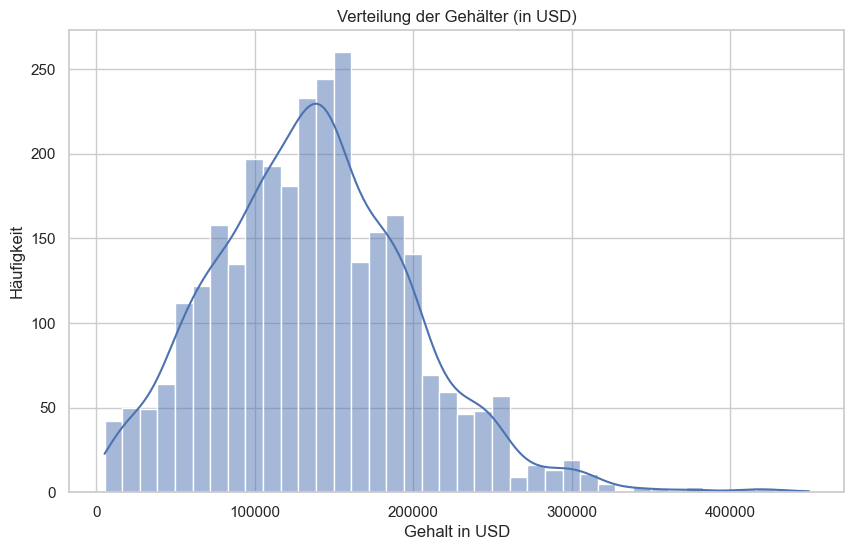

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True)
plt.title('Verteilung der Gehälter (in USD)')
plt.xlabel('Gehalt in USD')
plt.ylabel('Häufigkeit')
plt.show()


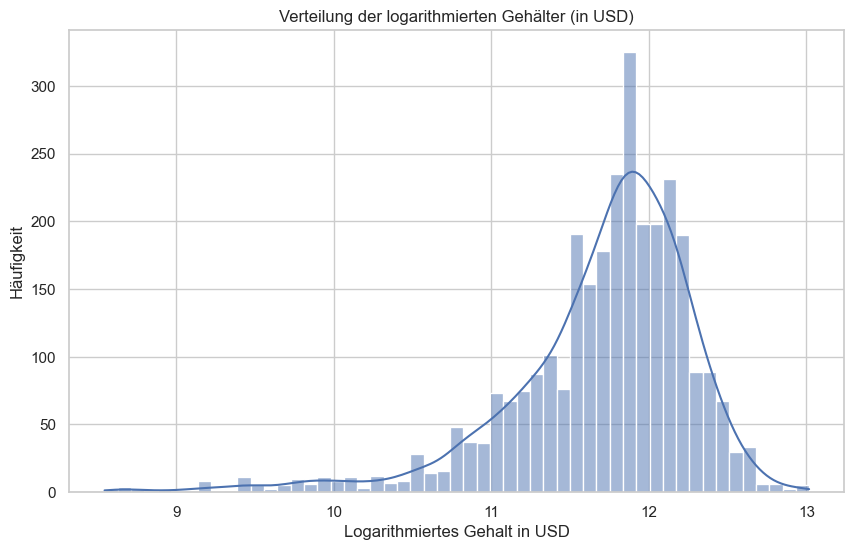

In [54]:
import numpy as np


y_train = np.log1p(y_train)

# Anzeigen der neuen Verteilung
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True)
plt.title('Verteilung der logarithmierten Gehälter (in USD)')
plt.xlabel('Logarithmiertes Gehalt in USD')
plt.ylabel('Häufigkeit')
plt.show()


### Entfernen von Salary

In [55]:
X_train.drop('salary', axis=1, inplace=True)
X_test.drop('salary', axis=1, inplace=True)

### Standardisierung der Daten

In [56]:
scaler = StandardScaler()


scaling_columns = ['work_year']


X_train[scaling_columns] = scaler.fit_transform(X_train[scaling_columns])
X_test[scaling_columns] = scaler.transform(X_test[scaling_columns])

In [57]:
# StandardScaler auf y train anwenden
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3004, 271), (751, 271), (3004, 1), (751, 1))

In [59]:
print("Die Dimensionen des Urpsrungsdatensatzes : {}".format(X_train.shape))
print("Die Dimensionen des umgeformten Datensatzes : {}".format(X_test.shape))

Die Dimensionen des Urpsrungsdatensatzes : (3004, 271)
Die Dimensionen des umgeformten Datensatzes : (751, 271)


In [60]:

pd.DataFrame(X_train).to_csv("Xtrain_salary_data.csv",index=False)
pd.DataFrame(X_test).to_csv("Xtest_salary_data.csv",index=False)
pd.DataFrame(y_train).to_csv("ytrain_salary_data.csv",index=False)
pd.DataFrame(y_test).to_csv("ytest_salary_data.csv",index=False)